In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

def drawPoint(x, y, c):
  print(f'({x}, {y})')
  plt.scatter(x, y, c = c)

In [2]:
def line_bresenham(p1, p2):
  puntos = []
  x0, y0 = p1
  x1, y1 = p2
  dif_x, dif_y = x1 - x0, y1 - y0 
  dx, dy = abs(dif_x), abs(dif_y)
  if dy >= dx:
    dx, dy = dy, dx
  inc_E = 2 * dy # 2dy
  inc_NE = inc_E - 2 * dx # 2dy - 2dx
  d = inc_E - dx # 2dy - dx
  x, y = x0, y0
  puntos.append((x, y))
  x_inc = 1 if dif_x > 0 else - 1
  y_inc = 1 if dif_y > 0 else - 1
  x_inc = x_inc if dif_x != 0 else 0
  y_inc = y_inc if dif_y != 0 else 0
  flag = (abs(dif_y/dif_x) if dif_x != 0 else 0 ) > 1
  for _ in range(dx):
    x = x + x_inc if not flag else x 
    y = y + y_inc if flag else y
    if (d < 0 and flag) or (d < 0 and x_inc != 0 and not flag):
      d = d + inc_E
    else: 
      x = x + x_inc if flag else x
      y = y + y_inc if not flag else y
      d = d + inc_NE
    puntos.append((x, y))
  return puntos

(1, 1) (3, 1)
(1, 1)
(0, 2)
(2, 1)
(1, 3)
(3, 1)
(2, 4)
(1, 1) (2, 3)
(1, 1)
(0, 2)
(2, 2)
(0, 4)
(2, 3)
(-1, 5)
(3, 1) (2, 3)
(3, 1)
(2, 4)
(2, 2)
(0, 4)
(2, 3)
(-1, 5)


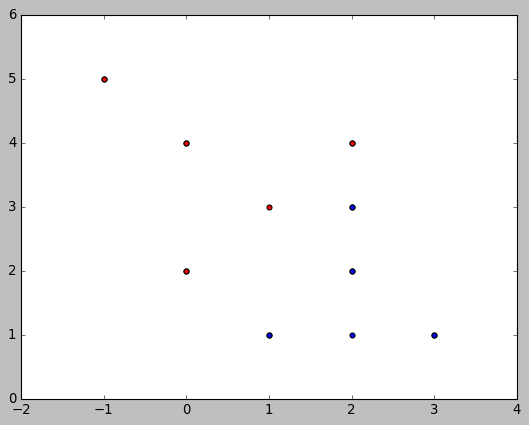

In [23]:
from math import sin, cos, pi
def rotacion_punto(x = 0, y = 0, xp = 0, yp = 0, teta = 0):
    '''
        Rotación de coordenadas mediante un punto fijo y un ángulo 
    '''
    teta = teta * pi / 180
    dif_x, dif_y, s, c = x - xp, y - yp, round(sin(teta)), round(cos(teta))
    return xp + dif_x * c - dif_y * s, xp + dif_x * s + dif_y * c

def get_rotacion(puntos = [], pf = (0, 0), teta = 0):
    r = len(puntos)
    if r < 1: return
    xpf, ypf = pf
    for i in range(r):
        for j in range(i, r):
            if puntos[i] != puntos[j]:
                print(puntos[i], puntos[j])
                for k in line_bresenham(puntos[i], puntos[j]):
                    x, y = k
                    drawPoint(x, y, 'blue')
                    xr, yr = rotacion_punto(x = x, y = y, xp = xpf, yp = ypf, teta = teta)
                    drawPoint(xr, yr, 'red')
p1 = (1, 1)
p2 = (3, 1)
p3 = (2, 3)
teta = 45
pf = (0, 0)
get_rotacion(puntos = [p1, p2, p3], teta = teta)